In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
import SVM_functions as svmf

Datawise, we're keeping t with shape (N, 1) in order for it to work with out formulas.

In [18]:
with open('synth_data/synth_0.1.csv', 'r') as f:
    data = np.loadtxt(f, delimiter=',')

np.random.shuffle(data)
X_train = data[:60, :-1]
t_train = data[:60, -1].reshape(-1, 1)
X_test = data[60: , :-1]
t_test = data[60: , -1].reshape(-1, 1)

In [21]:
X_train.shape, X_test.shape, t_train.shape, t_test.shape

((60, 2), (20, 2), (60, 1), (20, 1))

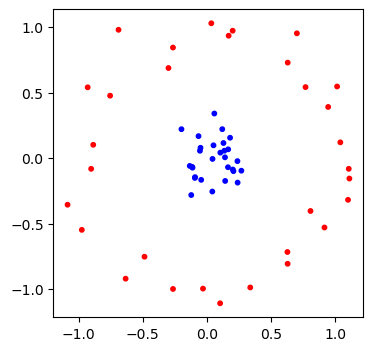

In [24]:
plt.figure(figsize=(4, 4))

plt.scatter(X_train[:, 0], X_train[:, 1], s = 10, c = t_train, cmap = 'bwr')
plt.show()

In [44]:
l = -1
gamma = 2 ** l
C = 1
N = X_train.shape[0]

P = matrix(np.array([[svmf.rbf_kernel(X_train[i], X_train[j], gamma) * t_train[i][0] * t_train[j][0] for i in range(N)] for j in range(N)]), tc='d')
q = matrix(np.full(N, -1), tc='d')
G = matrix(np.vstack((np.diag(-1 * np.ones(N)), np.diag(np.ones(N)))), tc='d')
h = matrix(np.vstack((np.zeros((N, 1)), C * np.ones((N, 1)))), tc='d')
A = matrix(t_train.reshape(1, -1), tc='d')
b = matrix(np.array([0]), tc='d')

In [45]:
sol = solvers.qp(P, q, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0: -9.5645e+00 -9.4726e+01  9e+01  3e-15  8e-16
 1: -1.0361e+01 -1.7151e+01  7e+00  1e-15  6e-16
 2: -1.1695e+01 -1.3702e+01  2e+00  3e-16  4e-16
 3: -1.2146e+01 -1.2870e+01  7e-01  6e-16  4e-16
 4: -1.2312e+01 -1.2532e+01  2e-01  2e-16  6e-16
 5: -1.2388e+01 -1.2432e+01  4e-02  1e-15  8e-16
 6: -1.2405e+01 -1.2408e+01  3e-03  2e-15  6e-16
 7: -1.2406e+01 -1.2406e+01  6e-05  2e-15  7e-16
 8: -1.2406e+01 -1.2406e+01  9e-06  6e-16  6e-16
Optimal solution found.


In [41]:
sol

{'x': <60x1 matrix, tc='d'>,
 'y': <1x1 matrix, tc='d'>,
 's': <120x1 matrix, tc='d'>,
 'z': <120x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 8.735800657868315e-06,
 'relative gap': 7.041687799715906e-07,
 'primal objective': -12.405833525054543,
 'dual objective': -12.405842260855202,
 'primal infeasibility': 5.551115123125783e-16,
 'dual infeasibility': 5.891054579151525e-16,
 'primal slack': 7.266241892116698e-08,
 'dual slack': 4.9798861461887344e-08,
 'iterations': 8}

In [27]:
alphas = np.array(sol['x'])

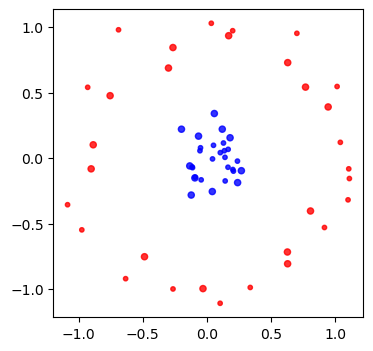

In [31]:
plt.figure(figsize=(4, 4))

sizes = np.full(N, 10)
sizes[alphas.flatten() > 1e-4] = 20

plt.scatter(X_train[:, 0], X_train[:, 1], s = sizes, c = t_train, cmap = 'bwr', alpha = 0.8)
plt.show()

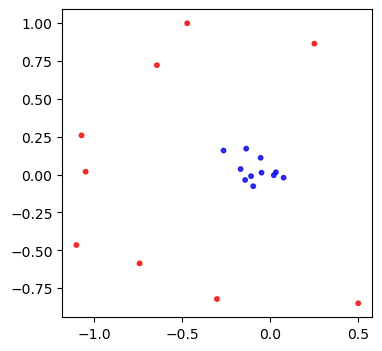

In [33]:
plt.figure(figsize=(4, 4))

plt.scatter(X_test[:, 0], X_test[:, 1], s = 10, c = t_test, cmap = 'bwr', alpha = 0.8)
plt.show()

We can't explicitly calculate the discriminant function, but can calculate the score for each test point. <br>
$y(x) = \Sigma_{n \in SV} \alpha_n t_n <\phi(x_n), \phi(x)> + b$

In [35]:
b = svmf.discriminant_bias(X_train, t_train, alphas, C, svmf.rbf_kernel, gamma)

In [36]:
scores = svmf.score_kSVM(X_test, X_train, t_train, alphas, b, svmf.rbf_kernel, gamma)

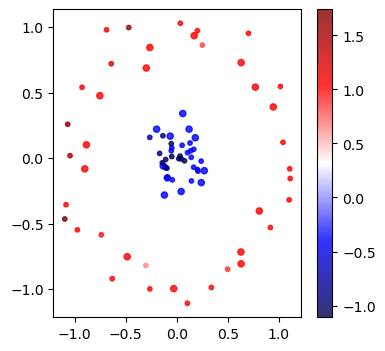

In [40]:
plt.figure(figsize=(4, 4))

plt.scatter(X_train[:, 0], X_train[:, 1], s = sizes, c = t_train, cmap = 'bwr', alpha = 0.8)
pc = plt.scatter(X_test[:, 0], X_test[:, 1], s = 10, c = scores, cmap = 'seismic', alpha = 0.8)
cbar = plt.colorbar(pc)
plt.show()